## James Griffin 
### Global Temp EDA 
#### Stat 536


CLIMATE CHANGE

“Climate change” refers to a change in the statistical distribution of average environmental conditions over time and can refer to diverse topics such as frequency of extreme weather, sea level rising and shifts in flowers blooming etc. “Global warming” is a more specific term referring to the long term warming of the earth since the late 1800?s / early 1900?s. Over the years, many scientists have sought to understand and project current temperatures forward in time. The dataset AnnAvgGlobalClimate.txt comes from the Berkeley Earth Laboratory and contains a detailed summary of the changes in Earth’s global average surface temperature estimated by combining the Berkeley Earth land-surface temperature field with a reinterpolated version of the HadSST ocean temperature field.

For this analysis, I want you to try to answer:
1. How many historical shifts in climate trends have there been in the historical record? 
2. What is the current annual increase in global temperatures?
3. What is your projection of that trend for the next 30 years?

In [1]:
#importing a bunch of stuff that I may use 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from pandas.plotting import scatter_matrix
import seaborn as sns
from scipy import stats
import warnings; warnings.simplefilter('ignore')

In [2]:
data = pd.read_csv('../data/climate_data.csv', delimiter = ' ')

In [3]:
data.head()

,Year,Month,AnnAnom,Time
0,1850,6,-0.529,1850.416667
1,1850,7,-0.487,1850.500000
2,1850,8,-0.507,1850.583333
3,1850,9,-0.528,1850.666667
4,1850,10,-0.526,1850.750000


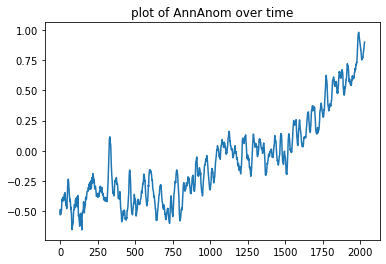

In [4]:
plt.plot(data.AnnAnom)
plt.title("plot of AnnAnom over time")
plt.show()

#1 wants us to find the how many historical shifts there have been in the data set, I this means to do like a multi trend line thing. like a first it looks like the ttemperature is reliitvely stable, not really ttrending in any particular dirrection, for about the first 750-800 observations,  then it starts increasing with a positive slope, from about 800 - 1500, and then it increases more drastically for the next 500 or so. 

In [5]:
d2 = data.loc[data.Year >= 1880]
#going to try and leave it out 


[1850.         1916.99946597 1941.04170672 1974.99999999 2019.        ]


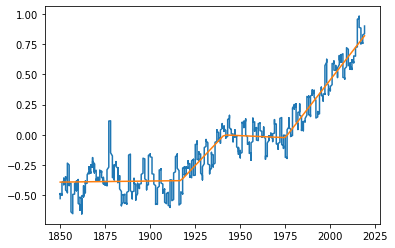

In [6]:
'''
working on some linear inturpelation stuff during in class session
'''
import pwlf

x = np.array(data.Year)
y = np.array(data.AnnAnom)

my_pwlf = pwlf.PiecewiseLinFit(x, y)
breaks = my_pwlf.fit(4)
print(breaks)

x_hat = np.linspace(x.min(), x.max(), 100)
y_hat = my_pwlf.predict(x_hat)

plt.figure()
plt.plot(x, y, '-')
plt.plot(x_hat, y_hat, '-')
plt.show()


In [7]:
#find lag of stuff with correlation to try and find true number of 
#"changes"



def autocorr(self, lag=1):
    """
    Lag-N autocorrelation

    Parameters
    ----------
    lag : int, default 1
        Number of lags to apply before performing autocorrelation.

    Returns
    -------
    autocorr : float
    """
    return self.corr(self.shift(lag))

autocorr(data.AnnAnom, lag = 12*12)

#yeah so our data is extrodinarily highly correlated, the data comes 
#in months, then if we multiply by 12, that's a 12 year gap. and 
#even then we have a correlation of .85



0.8572178003900632

In [8]:
#this isn't the best way to do it, but it is the eaiest, and I took a nasty fall at snowbird yesterday and my 
#head kind of hurts, so it's kinda what i'm in the mood to do - I actually had my go pro going so you can see 
#the footgage if you like, completely my fault, stupid decisison on my part 

first = data.iloc[data.index <=775]
second = data.iloc[776 <= data.index]
second = second.iloc[second.index < 1520]
third = data.iloc[data.index >= 1521]

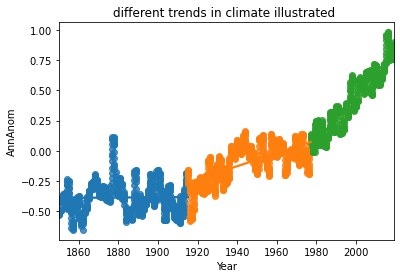

In [9]:
import seaborn as sns
plt.subplots()
sns.regplot(first.Year, first.AnnAnom)
sns.regplot(second.Year, second.AnnAnom)
sns.regplot(third.Year, third.AnnAnom)
plt.title("different trends in climate illustrated ")
plt.show()


#2 asks what is the current annual increase of global temp 

In [10]:
#getting the last 5 years of data and grouping by uear 
recent = data.loc[data.Year > 2009]
years = pd.DataFrame(recent.groupby(['Year']).mean())
y1 = years.reset_index()

In [11]:
c = []
for i in range(len(y1)-1):
    a=y1['AnnAnom'][i]
    b=y1['AnnAnom'][i+1]
    c.append(b-a)


    

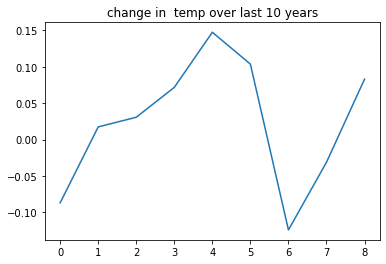

0.08291666666666664


In [12]:
plt.plot(c)
plt.title("change in  temp over last 10 years")
plt.show()
print(c[8])

so this shows that the marginal difference of the last year of the data  is that the temperature is increasing by .0829 degrees, so that it increased by that much since the year before 

In [13]:
#3 play RLS because of time series data

In [14]:
y = data.AnnAnom
X = data.Time
reg_obj = sm.RecursiveLS(y ,X)

results = reg_obj.fit()
print(results.summary())

                           Statespace Model Results                           
Dep. Variable:                AnnAnom   No. Observations:                 2029
Model:                    RecursiveLS   Log Likelihood                -816.145
Date:                Tue, 02 Mar 2021   R-squared:                       0.038
Time:                        17:49:05   AIC                           1634.290
Sample:                             0   BIC                           1639.905
                               - 2029   HQIC                          1636.351
Covariance Type:            nonrobust   Scale                            0.129
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Time       -3.672e-05   4.13e-06     -8.900      0.000   -4.48e-05   -2.86e-05
Ljung-Box (L1) (Q):                2014.61   Jarque-Bera (JB):               167.88
Prob(Q):                              0.00   Pr

In [15]:
-3.672e-05*2050

-0.075276

So this isn't a great answer, our R^2 form the RLS is basically 0, so our estimation that the temperature will have gone down by .07 degrees in 2050 is kinda a meh  prediction... all we did was take the coefficient of time, and multiply it by 2050. I think we might want to tryand implement some sort of polynomail features to imrpove the statistical model, because the relationsbip isn't super linear, as we showed above, but there is a relationship there. So we  need to be a little more creative in how  we approach the problem. 